In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import successful!
First 5 rows of the dataset:


,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%



Summary Statistics:


,終値,始値,高値,安値
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000



Missing Values:


終値       0
始値       0
高値       0
安値       0
出来高      0
変化率 %    0
dtype: int64

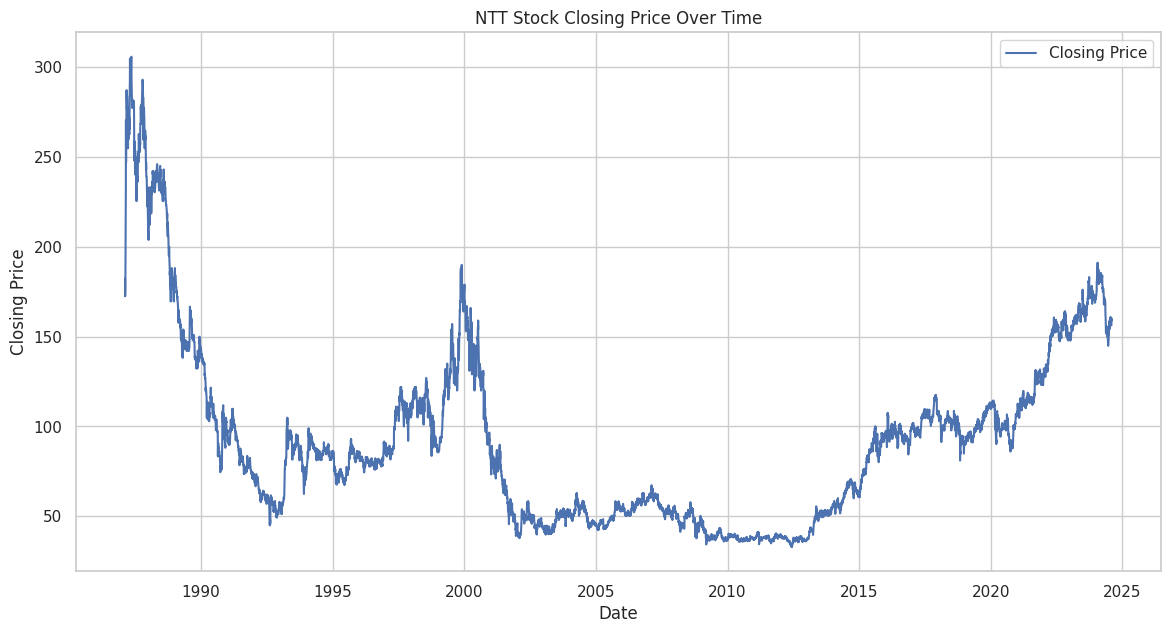

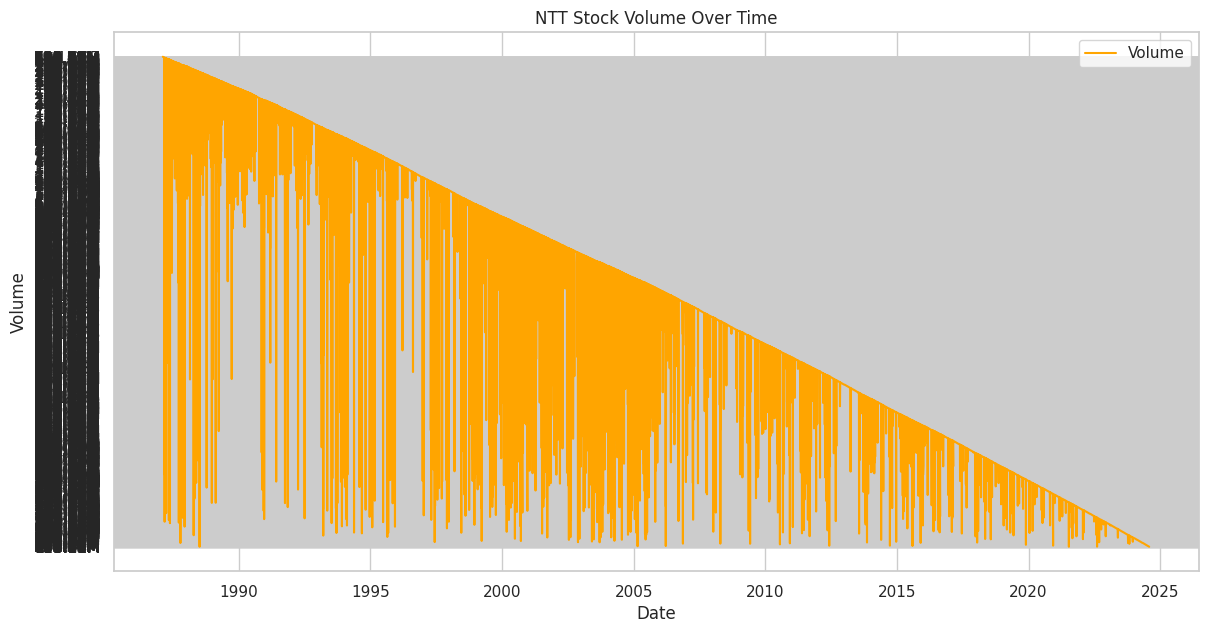

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from current font.
  fig.tight_layout()
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/seasonal.py:360: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


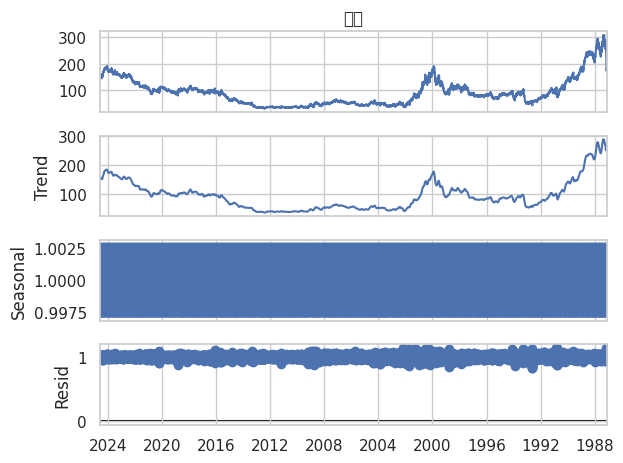

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32066 (\N{CJK UNIFIED IDEOGRAPH-7D42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


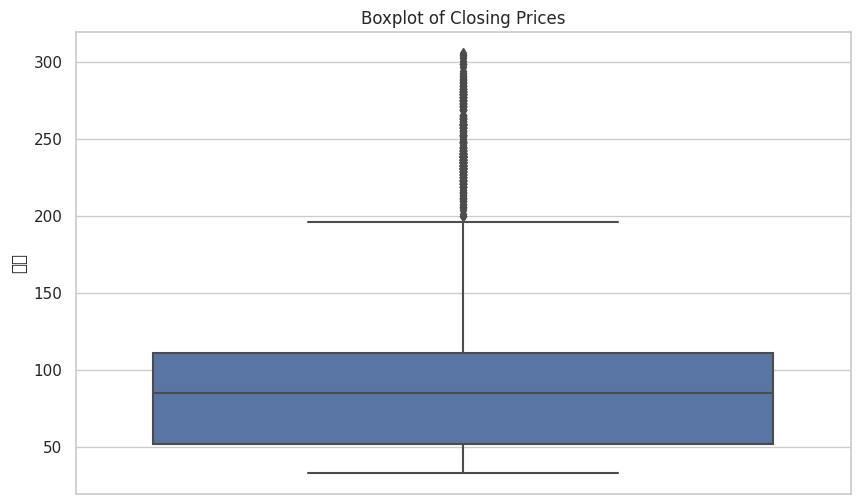

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
try:
    from statsmodels.tsa.seasonal import seasonal_decompose
    print("Import successful!")
except ImportError as e:
    print("ImportError:", e)

# Set plot style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("/kaggle/input/stock-prices/stock_price.csv")

# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Convert '日付け' (Date) to datetime format
df['日付け'] = pd.to_datetime(df['日付け'], format='%Y-%m-%d')

# Set '日付け' as the index
df.set_index('日付け', inplace=True)

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())

# Check for missing values
print("\nMissing Values:")
display(df.isnull().sum())

# Plot Closing Price Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['終値'], label='Closing Price')
plt.title('NTT Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Plot Volume Over Time
plt.figure(figsize=(14, 7))
plt.plot(df['出来高'], label='Volume', color='orange')
plt.title('NTT Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Time Series Decomposition
result = seasonal_decompose(df['終値'], model='multiplicative', period=30)
result.plot()
plt.tight_layout()
plt.show()

# Detect Outliers using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['終値'])
plt.title('Boxplot of Closing Prices')
plt.show()


In [2]:
from sklearn.preprocessing import MinMaxScaler

# Handle missing values (if any)
df = df.fillna(method='ffill')  # Forward fill
df = df.fillna(method='bfill')  # Backward fill

# Verify no missing values remain
print("\nMissing Values After Handling:")
display(df.isnull().sum())

# Feature Selection: We'll use '終値' (Closing Price) for prediction
data = df[['終値']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define sequence length (e.g., 60 days)
sequence_length = 60

# Function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Create training and testing datasets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - sequence_length:]  # Include overlap for sequences

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape inputs to be [samples, time steps, features] for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"\nTraining Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")



Missing Values After Handling:


/tmp/ipykernel_30/2356672479.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill
/tmp/ipykernel_30/2356672479.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')  # Backward fill


終値       0
始値       0
高値       0
安値       0
出来高      0
変化率 %    0
dtype: int64


Training Data Shape: (7301, 60, 1)
Testing Data Shape: (1841, 60, 1)


In [5]:
# pip install tensorflow -i https://pypi.tuna.tsinghua.edu.cn/simple

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(units=25))
model.add(Dense(units=1))  # Prediction of the next closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model architecture
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=30,
    validation_data=(X_test, y_test),
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 0.0039 - val_loss: 8.6922e-04
Epoch 2/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 4.0969e-04 - val_loss: 6.9311e-04
Epoch 3/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 3.2388e-04 - val_loss: 0.0010
Epoch 4/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 2.7563e-04 - val_loss: 4.6630e-04
Epoch 5/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 2.5577e-04 - val_loss: 4.4588e-04
Epoch 6/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 2.5652e-04 - val_loss: 7.5236e-04
Epoch 7/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 2.3249e-04 - val_loss: 3.8808e-04
Epoch 8/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 2.6406e-04 - val_loss: 3.6510e-04
Epoch 9/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 2.6383e-04 - val_loss: 8.5934e-04
Epoch 10/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 2.4504e-04 - val_loss: 9.8919e-04
Epoch 11/30
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 48

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
Root Mean Squared Error (RMSE): 4.113057416654602
Mean Absolute Error (MAE): 2.670365316876894


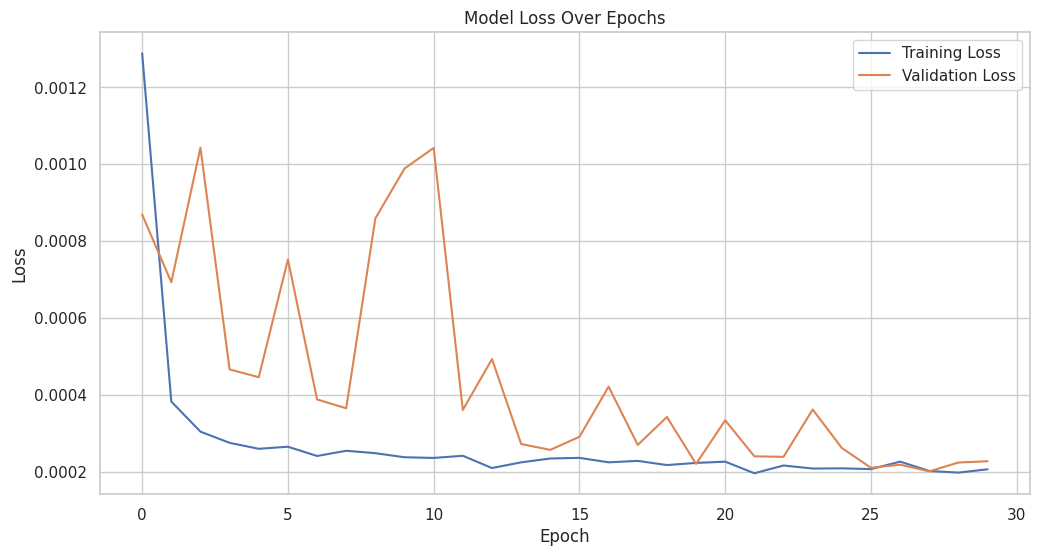

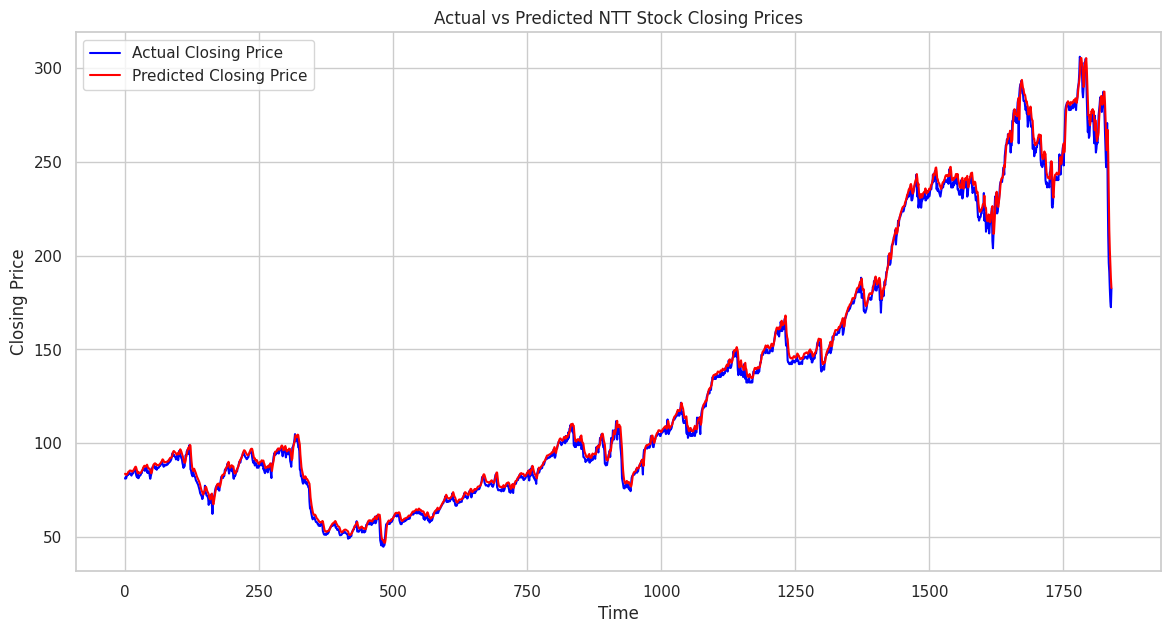

In [6]:
# Make predictions on the test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverse scaling

# Actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Actual vs Predicted Prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Closing Price', color='blue')
plt.plot(predictions, label='Predicted Closing Price', color='red')
plt.title('Actual vs Predicted NTT Stock Closing Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


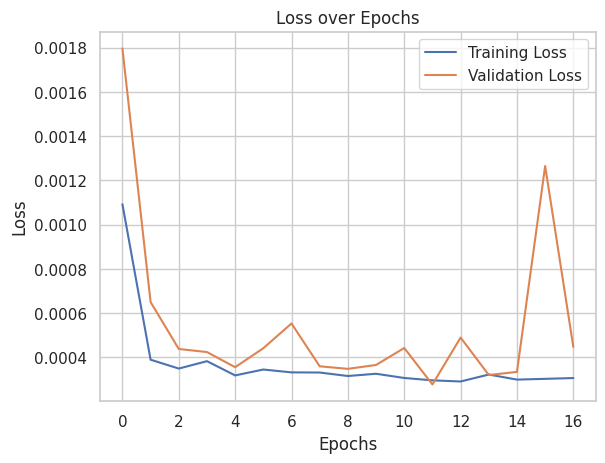

In [12]:
import matplotlib.pyplot as plt

plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define a learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Initialize TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Build a new LSTM model with different hyperparameters
model_improved = Sequential()

# Increase units and adjust dropout rates
model_improved.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_improved.add(Dropout(0.2))

model_improved.add(LSTM(units=100, return_sequences=False))
model_improved.add(Dropout(0.2))

model_improved.add(Dense(units=30))
model_improved.add(Dense(units=1))

# Compile the model with a lower learning rate
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the improved model
history_improved = model_improved.fit(
    X_train, y_train,
    batch_size=32,  # Experiment with batch size
    epochs=60,  # Keep epochs high to allow learning
    validation_data=(X_test, y_test),
    callbacks=[early_stop, tensorboard_callback, reduce_lr],
    verbose=1
)


Epoch 1/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 24s 88ms/step - loss: 0.0026 - val_loss: 6.3920e-04 - learning_rate: 0.0010
Epoch 2/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 3.5472e-04 - val_loss: 5.2174e-04 - learning_rate: 0.0010
Epoch 3/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 2.3737e-04 - val_loss: 5.0116e-04 - learning_rate: 0.0010
Epoch 4/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - loss: 1.9344e-04 - val_loss: 4.4058e-04 - learning_rate: 0.0010
Epoch 5/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 2.1175e-04 - val_loss: 3.7400e-04 - learning_rate: 0.0010
Epoch 6/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 1.8278e-04 - val_loss: 4.5141e-04 - learning_rate: 0.0010
Epoch 7/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - loss: 1.9262e-04 - val_loss: 3.1195e-04 - learning_rate: 0.0010
Epoch 8/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 1.7553e-04 - val_loss: 3.1468e-04 - learning_rate: 0.0010
Epoch 9/60
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [23]:
# Calculate Moving Averages
df['MA10'] = df['終値'].rolling(window=10).mean()
df['MA50'] = df['終値'].rolling(window=50).mean()

# Calculate Exponential Moving Average
df['EMA20'] = df['終値'].ewm(span=20, adjust=False).mean()

# Drop NaN values resulting from rolling calculations
df.dropna(inplace=True)

# Feature Selection: Use multiple features now
features = ['終値', 'MA10', 'MA50', 'EMA20']
data_features = df[features].values

# Normalize the features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_data_features = scaler_features.fit_transform(data_features)

# Create sequences with multiple features
def create_sequences_multivariate(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # Predict '終値'
    return np.array(X), np.array(y)

# Split data
train_size_feat = int(len(scaled_data_features) * 0.8)
train_data_feat = scaled_data_features[:train_size_feat]
test_data_feat = scaled_data_features[train_size_feat - sequence_length:]

X_train_feat, y_train_feat = create_sequences_multivariate(train_data_feat, sequence_length)
X_test_feat, y_test_feat = create_sequences_multivariate(test_data_feat, sequence_length)

print(f"\nMultivariate Training Data Shape: {X_train_feat.shape}")
print(f"Multivariate Testing Data Shape: {X_test_feat.shape}")

# Build LSTM model for multivariate data
model_multivariate = Sequential()

model_multivariate.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_feat.shape[1], X_train_feat.shape[2])))
model_multivariate.add(Dropout(0.2))

model_multivariate.add(LSTM(units=50, return_sequences=False))
model_multivariate.add(Dropout(0.2))

model_multivariate.add(Dense(units=25))
model_multivariate.add(Dense(units=1))

# Compile the model
model_multivariate.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_multivariate = model_multivariate.fit(
    X_train_feat, y_train_feat,
    batch_size=32,
    epochs=20,
    validation_data=(X_test_feat, y_test_feat),
    verbose=1
)



Multivariate Training Data Shape: (7262, 60, 4)
Multivariate Testing Data Shape: (1831, 60, 4)
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


227/227 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - loss: 5.7577e-04 - val_loss: 9.7118e-04
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 3.9672e-04 - val_loss: 7.9858e-04
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 3.7614e-04 - val_loss: 6.3244e-04
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 3.2891e-04 - val_loss: 5.5852e-04
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 3.2158e-04 - val_loss: 5.7126e-04
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 2.6480e-04 - val_loss: 7.2782e-04
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 2.5316e-04 - val_loss: 5.9376e-04
Epoch 9/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 2.6094e-04 - val_loss: 4.4197e-04
Epoch 10/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 2.7970e-04 - val_loss: 4.0700e-04
Epoch 11/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - l

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step

Model Performance Comparison:


,Model,RMSE,MAE
0,Original LSTM,4.113057,2.670365
1,Improved LSTM,3.731433,2.327982
2,Multivariate LSTM,4.009535,2.523474


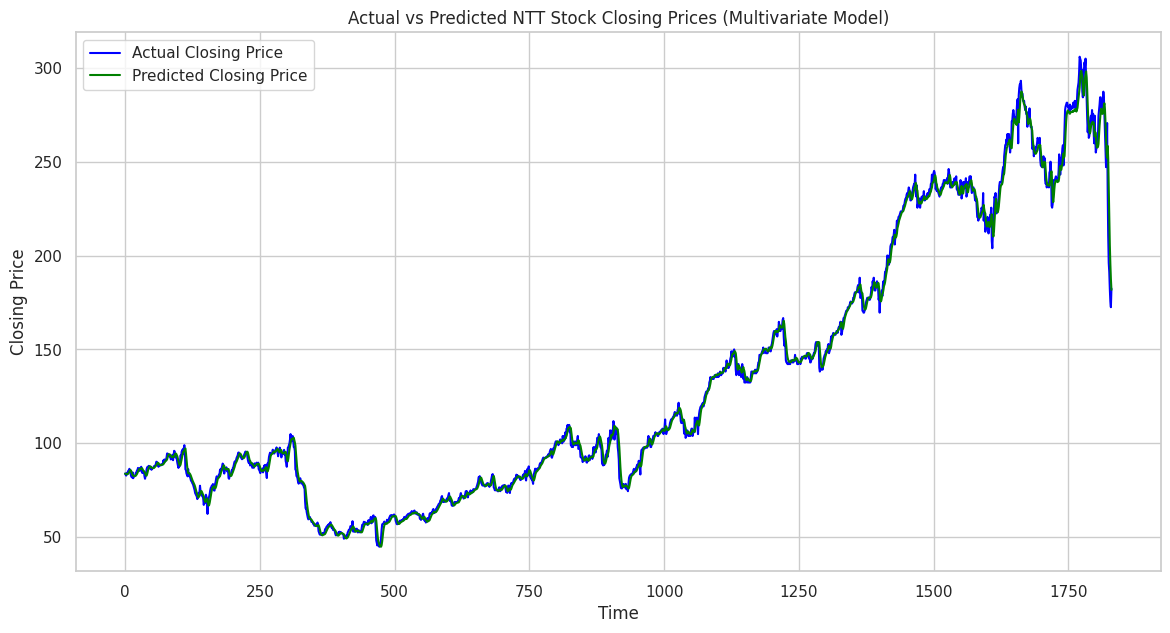

In [24]:
# Evaluate Original Model
predictions_original = model.predict(X_test)
predictions_original = scaler.inverse_transform(predictions_original)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse_original = np.sqrt(mean_squared_error(y_test_original, predictions_original))
mae_original = mean_absolute_error(y_test_original, predictions_original)

# Evaluate Improved Model
predictions_improved = model_improved.predict(X_test)
predictions_improved = scaler.inverse_transform(predictions_improved)
y_test_improved = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse_improved = np.sqrt(mean_squared_error(y_test_improved, predictions_improved))
mae_improved = mean_absolute_error(y_test_improved, predictions_improved)

# Evaluate Multivariate Model
predictions_multivariate = model_multivariate.predict(X_test_feat)
predictions_multivariate = scaler_features.inverse_transform(
    np.concatenate((predictions_multivariate, np.zeros((predictions_multivariate.shape[0], 3))), axis=1)
)[:,0]  # Only '終値'

y_test_multivariate = scaler_features.inverse_transform(
    np.concatenate((y_test_feat.reshape(-1,1), np.zeros((y_test_feat.shape[0], 3))), axis=1)
)[:,0]

rmse_multivariate = np.sqrt(mean_squared_error(y_test_multivariate, predictions_multivariate))
mae_multivariate = mean_absolute_error(y_test_multivariate, predictions_multivariate)

# Display Results
performance = pd.DataFrame({
    'Model': ['Original LSTM', 'Improved LSTM', 'Multivariate LSTM'],
    'RMSE': [rmse_original, rmse_improved, rmse_multivariate],
    'MAE': [mae_original, mae_improved, mae_multivariate]
})

print("\nModel Performance Comparison:")
display(performance)

# Plot Actual vs Predicted for the Best Model (Assuming Multivariate is Best)
plt.figure(figsize=(14, 7))
plt.plot(y_test_multivariate, label='Actual Closing Price', color='blue')
plt.plot(predictions_multivariate, label='Predicted Closing Price', color='green')
plt.title('Actual vs Predicted NTT Stock Closing Prices (Multivariate Model)')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
